results for h=0.1: 

x=0.00000, y=1.00000, y_exact=1.00000, error=0.00000
x=0.10000, y=0.36770, y_exact=0.36788, error=0.00018
x=0.20000, y=0.13523, y_exact=0.13534, error=0.00011
x=0.30000, y=0.05021, y_exact=0.04979, error=0.00042
x=0.40000, y=0.01914, y_exact=0.01832, error=0.00083
x=0.50000, y=0.00497, y_exact=0.00674, error=0.00177
x=0.60000, y=-0.00155, y_exact=0.00248, error=0.00402
x=0.70000, y=0.00852, y_exact=0.00091, error=0.00760
x=0.80000, y=0.01615, y_exact=0.00034, error=0.01581
x=0.90000, y=-0.17980, y_exact=0.00012, error=0.17993
x=1.00000, y=0.00005, y_exact=0.00005, error=0.00000
Maximum error for h = 0.1: 0.1799259611

results for h=0.05: 

x=0.00000, y=1.00000, y_exact=1.00000, error=0.00000
x=0.05000, y=0.60648, y_exact=0.60653, error=0.00005
x=0.10000, y=0.36770, y_exact=0.36788, error=0.00018
x=0.15000, y=0.22313, y_exact=0.22313, error=0.00000
x=0.20000, y=0.13523, y_exact=0.13534, error=0.00011
x=0.25000, y=0.08195, y_exact=0.08208, error=0.00014
x=0.30000, y=

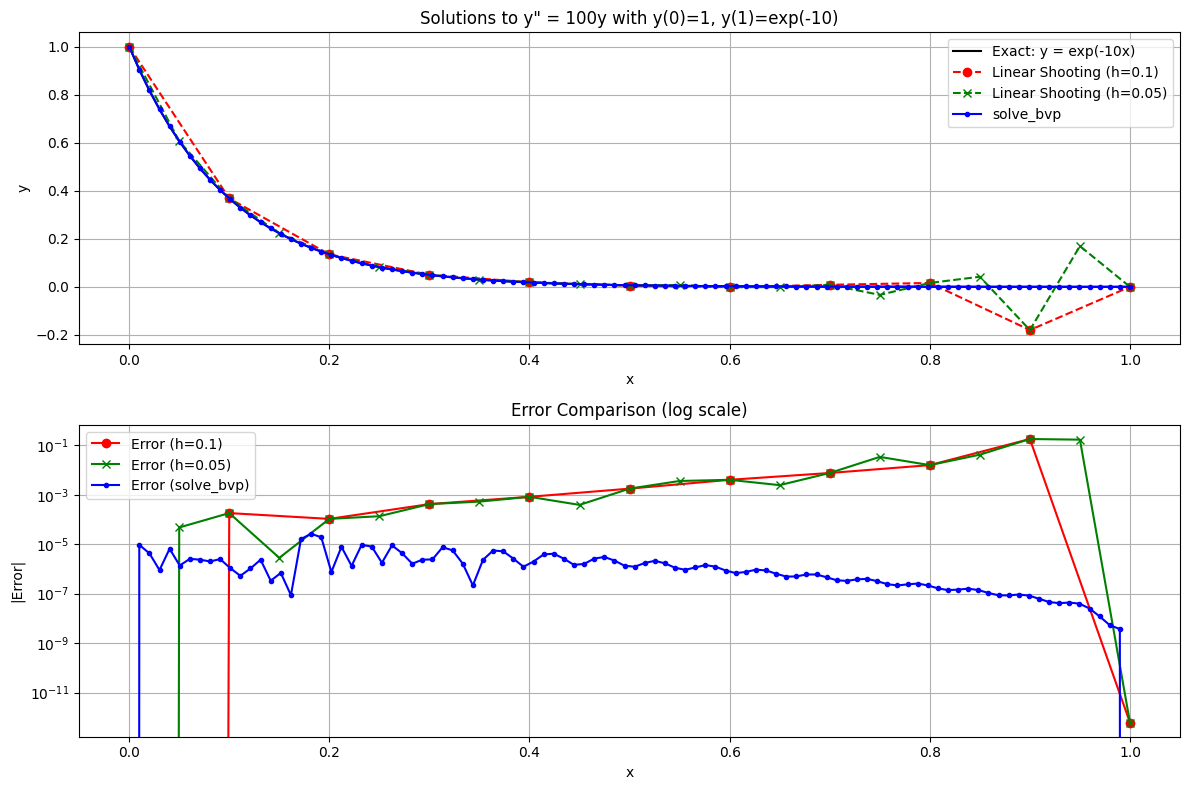

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp ,solve_bvp

def linear_shooting_method(f,a,b,alpha,beta,h,max_iter=10,tol=1e-06):
    n=int((b-a)/h)

    def ivp1(x,y):
        return [y[1],f(x,y[0],y[1])]
    
    def ivp2(x,y):
        return [y[1],f(x,y[0],y[1])]
    
    x=np.linspace(a,b,n+1)

    sol1=solve_ivp(ivp1,[a,b],[alpha,0],t_eval=x,method='RK45')
    y1=sol1.y[0]

    sol2=solve_ivp(ivp2,[a,b],[0,1],t_eval=x,method='RK45')
    y2=sol2.y[0]

    c=(beta-y1[-1])/y2[-1]
    y=y1+c*y2

    return x,y

def f(x,y,y_prime):
    return 100*y

a,b=0,1
alpha,beta=1,np.exp(-10)

def exact(x):
    return np.exp(-10*x)

h1=0.1
h2=0.05

x1,y1=linear_shooting_method(f,a,b,alpha,beta,h1)
x2,y2=linear_shooting_method(f,a,b,alpha,beta,h2)

y_exact1=exact(x1)
y_exact2=exact(x2)

y_error1=np.abs(y1-y_exact1)
y_error2=np.abs(y2-y_exact2)

print(f'results for h=0.1: \n')
for i in range(len(x1)):
    print(f'x={x1[i]:0.5f}, y={y1[i]:0.5f}, y_exact={y_exact1[i]:0.5f}, error={y_error1[i]:0.5f}')
print(f"Maximum error for h = 0.1: {np.max(y_error1):.10f}\n")

print(f'results for h=0.05: \n')
for i in range(len(x2)):
    print(f'x={x2[i]:0.5f}, y={y2[i]:0.5f}, y_exact={y_exact2[i]:0.5f}, error={y_error2[i]:0.5f}')
print(f"Maximum error for h = 0.05: {np.max(y_error1):.10f}\n")    

def bvp_func(x,y):
     return np.vstack((y[1],100*y[0]))

def bc(ya,yb):
    return np.array([ya[0]-1,yb[0]-np.exp(-10)])

x_bvp=np.linspace(0,1,20)
y_bvp=np.zeros((2,x_bvp.size))
y_bvp[0] = np.exp(-10 * x_bvp)  
y_bvp[1] = -10 * np.exp(-10 * x_bvp) 

bvp = solve_bvp(bvp_func, bc, x_bvp, y_bvp)

x_plot=np.linspace(0,1,100)
y_plot_bvp=bvp.sol(x_plot)[0]
y_plot_exact=exact(x_plot)

error_bvp = np.abs(y_plot_bvp - y_plot_exact)
print(f"\nMaximum error for solve_bvp: {np.max(error_bvp):.10f}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x_plot, y_plot_exact, 'k-', label='Exact: y = exp(-10x)')
plt.plot(x1, y1, 'ro--', label='Linear Shooting (h=0.1)')
plt.plot(x2, y2, 'gx--', label='Linear Shooting (h=0.05)')
plt.plot(x_plot, y_plot_bvp, 'b.-', label='solve_bvp')
plt.legend()
plt.title('Solutions to y" = 100y with y(0)=1, y(1)=exp(-10)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogy(x1, y_error1, 'ro-', label='Error (h=0.1)')
plt.semilogy(x2, y_error2, 'gx-', label='Error (h=0.05)')
plt.semilogy(x_plot, error_bvp, 'b.-', label='Error (solve_bvp)')
plt.legend()
plt.title('Error Comparison (log scale)')
plt.xlabel('x')
plt.ylabel('|Error|')
plt.grid(True)

plt.tight_layout()
plt.show()

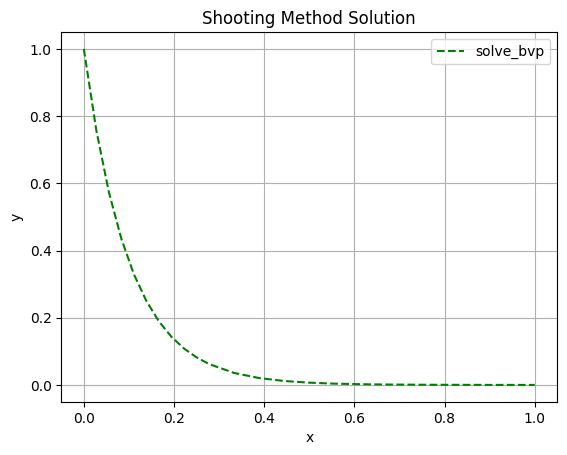

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
import matplotlib.pyplot as plt

h = 0.1
x = np.linspace(0,1,10)

def f(x,y):
    return np.vstack((y[1], 100*y[0]))

def bc(ya,yb):
    return np.array([ya[0]-1, yb[0]-np.exp(-10)])

y0 = np.zeros((2,x.size))
y0[0] = 1
y0[1] = -10
sol = solve_bvp(f, bc, x, y0)
x_bvp = sol.x   
y_bvp = sol.y[0]
plt.plot(x_bvp, y_bvp, 'g--', label='solve_bvp')
plt.xlabel('x') 
plt.ylabel('y')
plt.title('Shooting Method Solution')
plt.legend()
plt.grid(True)
plt.show()
    